In [1]:
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../creditOne.csv')
df.drop(labels="Unnamed: 0", axis="columns", inplace=True)
df["DEFAULT_NEXT_MONTH"] = df["DEFAULT_NEXT_MONTH"].astype('category')
df["SEX"] = df["SEX"].astype("category")
df["EDUCATION"] = df["EDUCATION"].astype("category")
df["MARRIAGE"] = df["MARRIAGE"].astype("category").cat.as_ordered()
df["SEX"] = df["SEX"].astype("category")
df["ID"] = df["ID"].apply(str).astype("string")
print(df.head())
print(df.info())
print(df.describe())

  ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0  1    20000.0  female  university        1  24.0    2.0    2.0   -1.0   
1  2   120000.0  female  university        2  26.0   -1.0    2.0    0.0   
2  3    90000.0  female  university        2  34.0    0.0    0.0    0.0   
3  4    50000.0  female  university        1  37.0    0.0    0.0    0.0   
4  5    50000.0    male  university        1  57.0   -1.0    0.0   -1.0   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0   -1.0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1    0.0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2    0.0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3    0.0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4    0.0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT_NEXT_MONTH  
0       0.0   

In [3]:
def sexConvertor(str):
    return '1 0' if str == "female" else '0 1'
def educationConverter(str):
    if str == "graduate school": return '1 0 0 0'
    if str == "high school": return '0 1 0 0'
    if str == "other": return '0 0 1 0'
    if str == "university": return '0 0 0 1'
    return '0 0 0 0' 
def marriageConverter(str):
    if str == "0": return '1 0 0 0'
    if str == "1": return '0 1 0 0'
    if str == "2": return '0 0 1 0'
    if str == "3": return '0 0 0 1'
    return '0 0 0 0'

df[["SEX_FEMALE", "SEX_MALE"]] = df["SEX"].map(sexConvertor).str.split(' ',expand=True).replace("0", False).replace("1",True)
df[["ED_GRAD", "ED_HS", "ED_OTHER", "ED_UNI"]] = df["EDUCATION"].map(educationConverter).str.split(' ',expand=True).replace("0", False).replace("1",True)
df[["MARRIAGE_0", "MARRIAGE_1", "MARRIAGE_2", "MARRIAGE_3"]] = df["MARRIAGE"].map(marriageConverter).str.split(' ',expand=True).replace("0", False).replace("1",True)

df["DEFAULT_NEXT_MONTH"] = df["DEFAULT_NEXT_MONTH"].replace("default",True).replace("not default", False).astype("bool")

print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  30000 non-null  string  
 1   LIMIT_BAL           30000 non-null  float64 
 2   SEX                 30000 non-null  category
 3   EDUCATION           30000 non-null  category
 4   MARRIAGE            30000 non-null  category
 5   AGE                 30000 non-null  float64 
 6   PAY_0               30000 non-null  float64 
 7   PAY_2               30000 non-null  float64 
 8   PAY_3               30000 non-null  float64 
 9   PAY_4               30000 non-null  float64 
 10  PAY_5               30000 non-null  float64 
 11  PAY_6               30000 non-null  float64 
 12  BILL_AMT1           30000 non-null  float64 
 13  BILL_AMT2           30000 non-null  float64 
 14  BILL_AMT3           30000 non-null  float64 
 15  BILL_AMT4           30000 non-null  

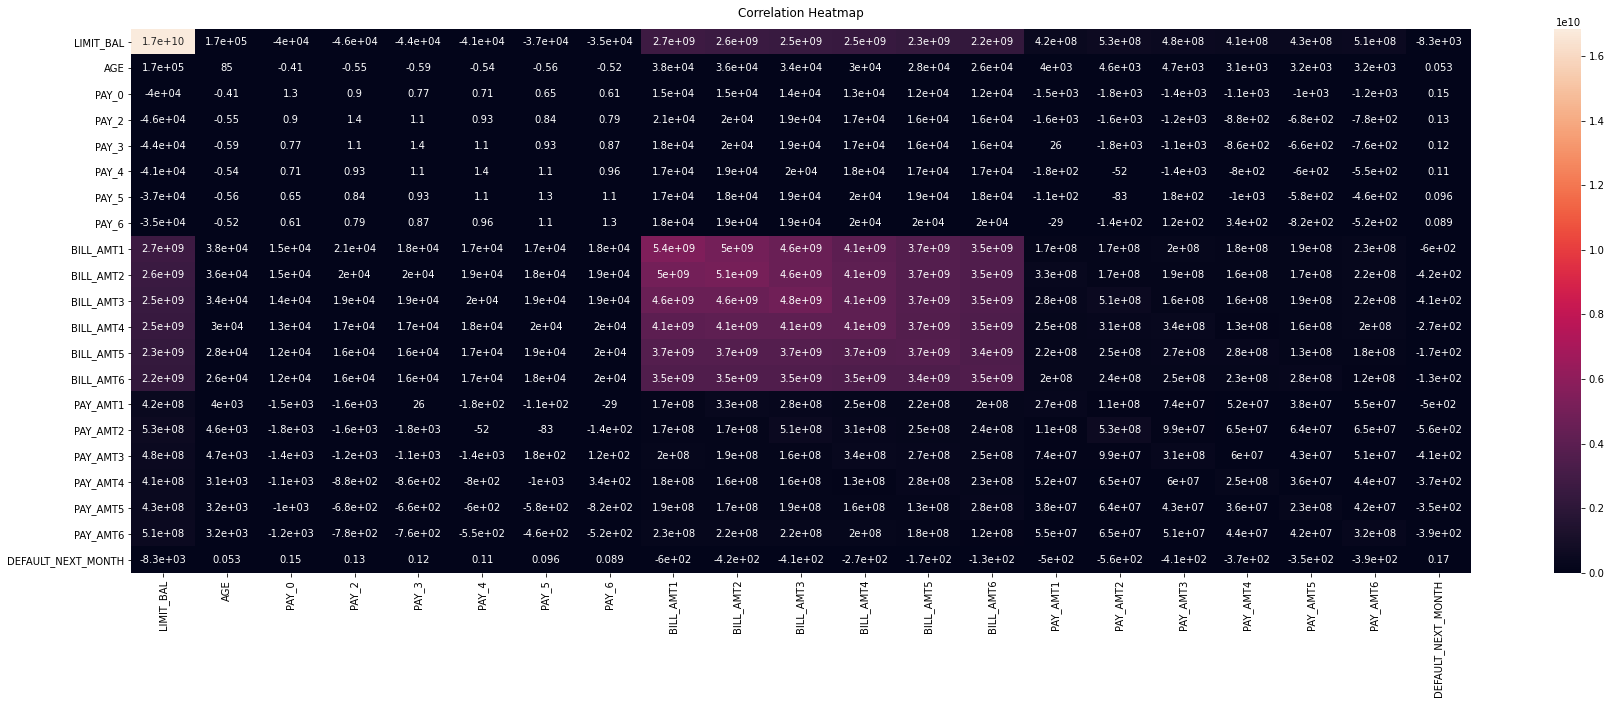

In [36]:
plt.figure(figsize=(30, 10))

# drop weakest covariance columns
modifiedDF = df.drop(
    [
        "MARRIAGE_0",
        "MARRIAGE_1",
        "MARRIAGE_2",
        "MARRIAGE_3",
        "SEX_MALE",
        "SEX_FEMALE",
        "ED_GRAD",
        "ED_HS",
        "ED_OTHER",
        "ED_UNI",
    ],
    axis="columns"
)
cov = modifiedDF.cov()
heatmap = sns.heatmap(cov, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

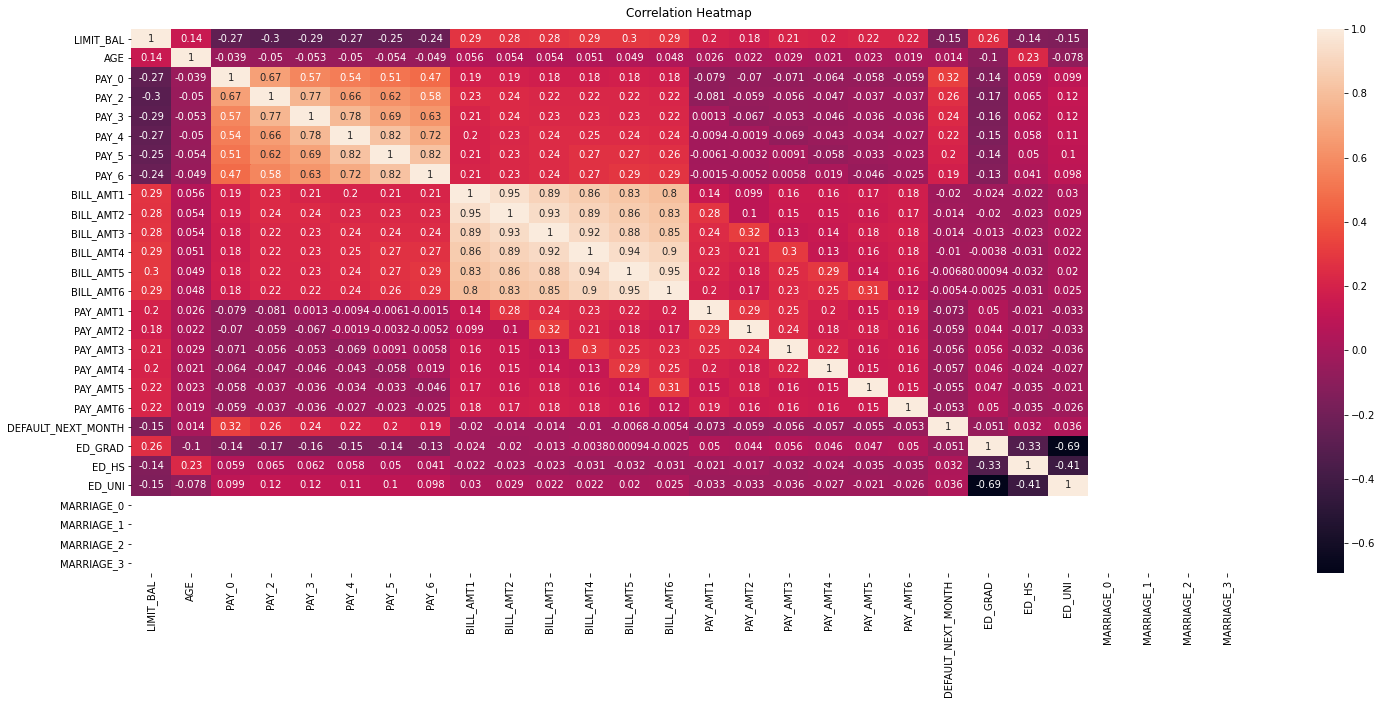

In [35]:
plt.figure(figsize=(25, 10))

# Eliminate weakest correlation columns to LIMIT BALANCE
modifiedDF = df.drop(
    [
        "SEX_MALE",
        "SEX_FEMALE",
        "ED_OTHER",
    ],
    axis="columns"
)

corr = modifiedDF.corr()

heatmap = sns.heatmap(corr, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

LIMIT_BAL


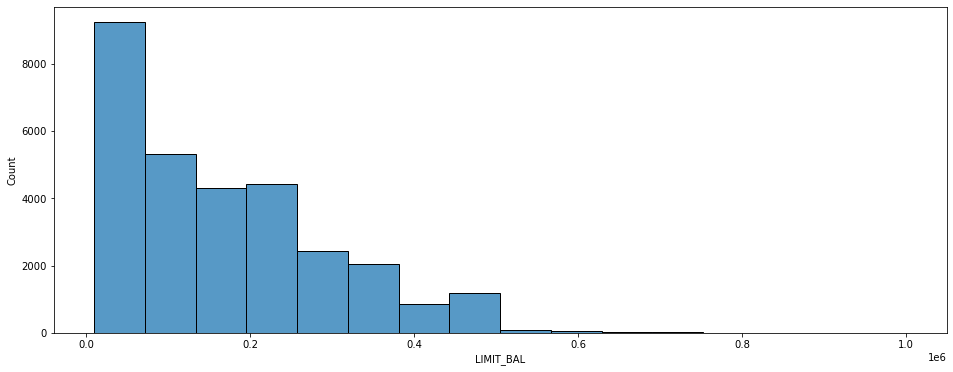

SEX


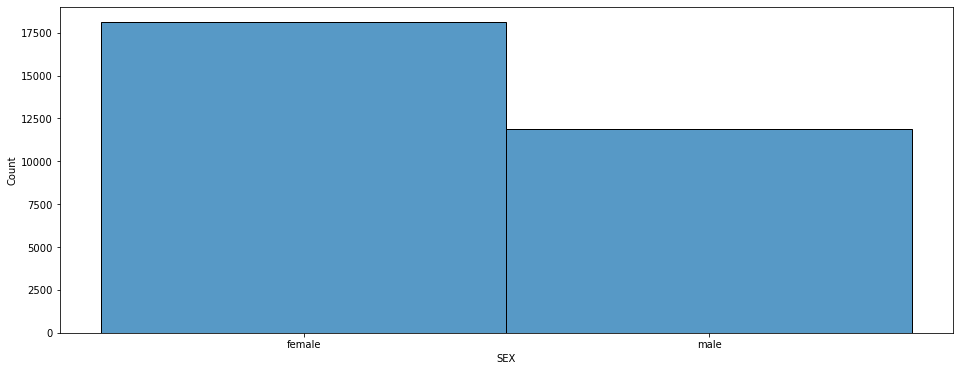

EDUCATION


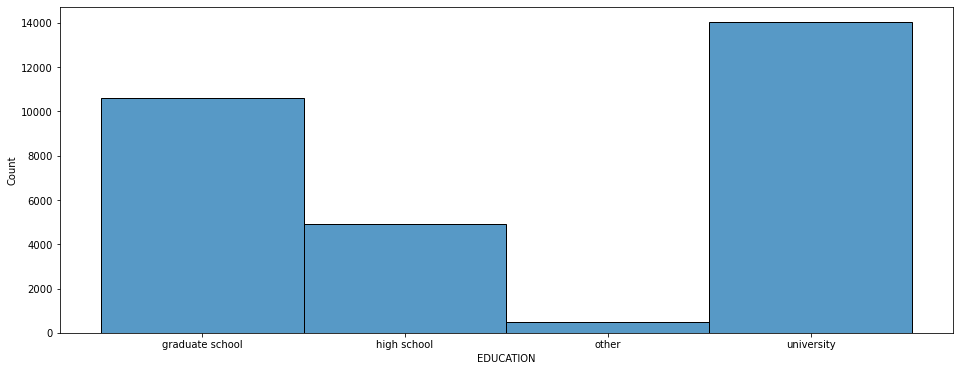

MARRIAGE


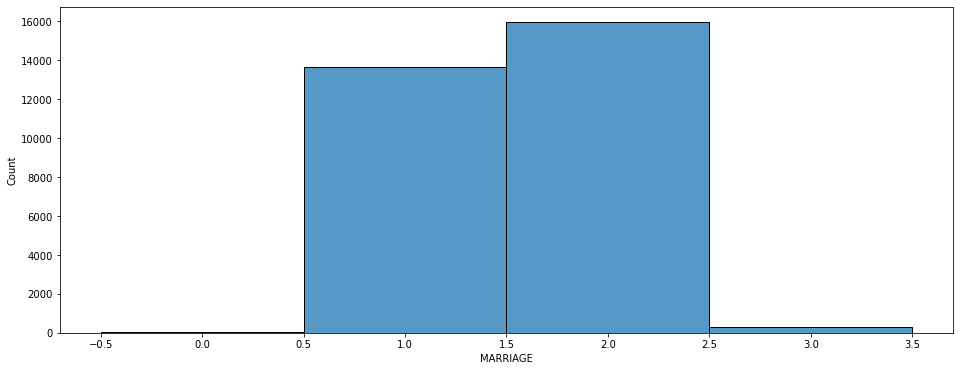

AGE


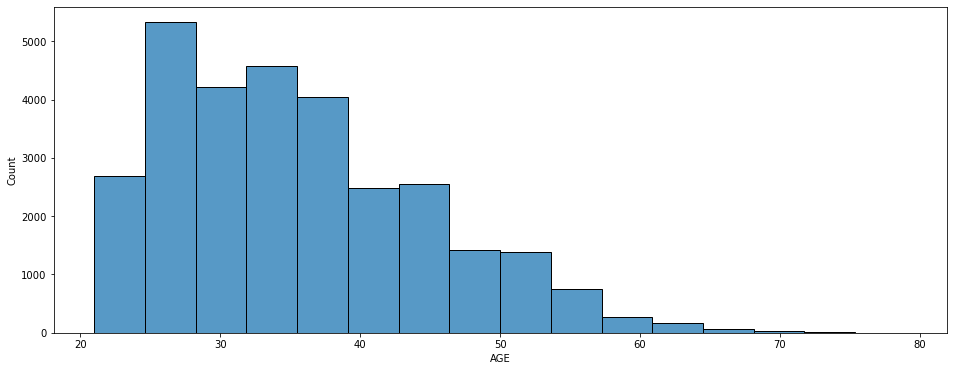

PAY_0


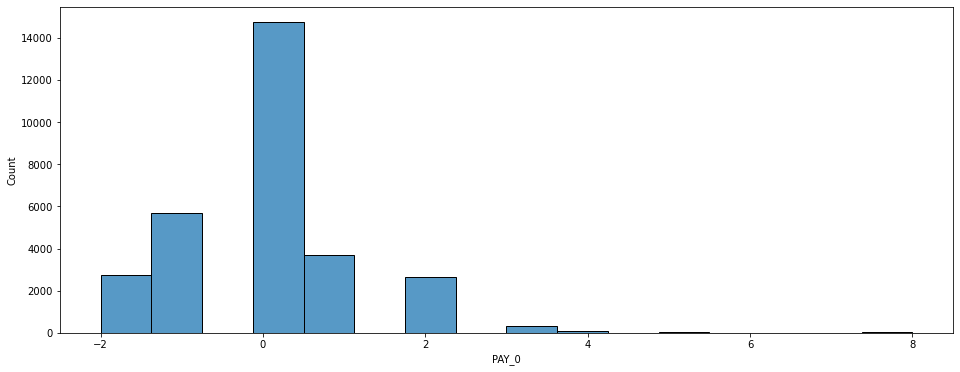

PAY_2


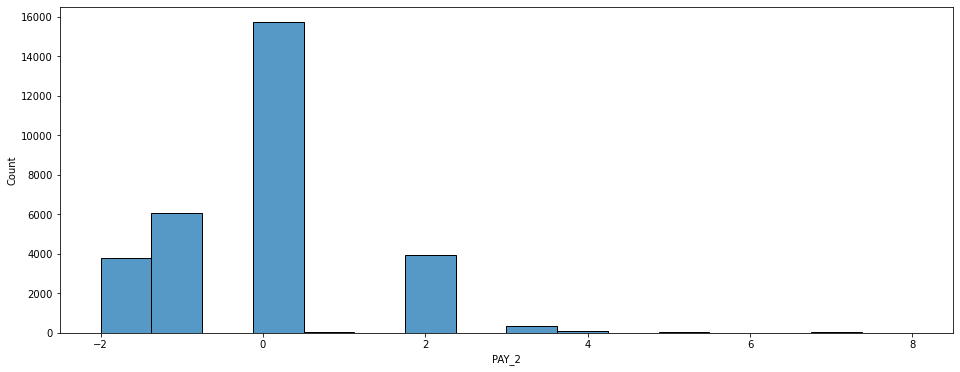

PAY_3


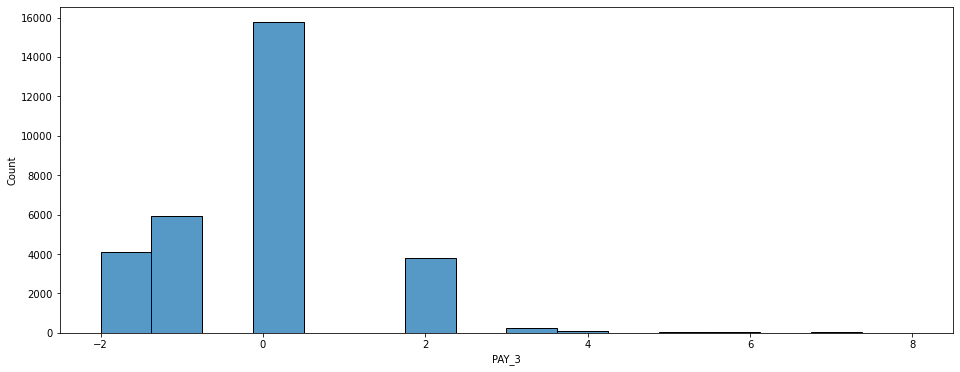

PAY_4


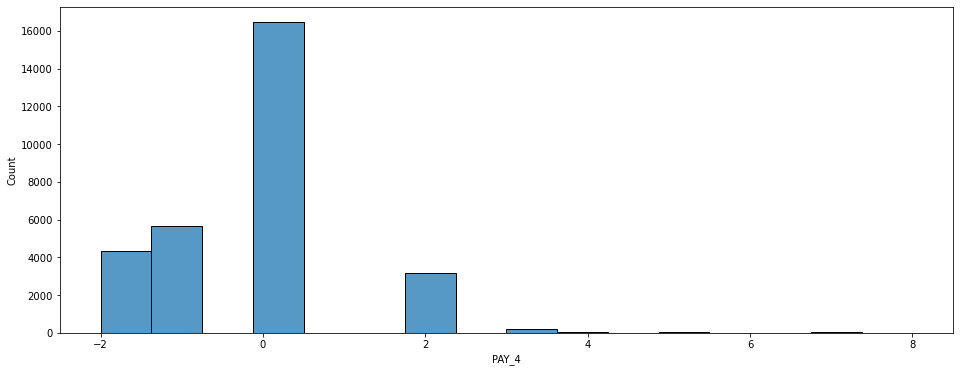

PAY_5


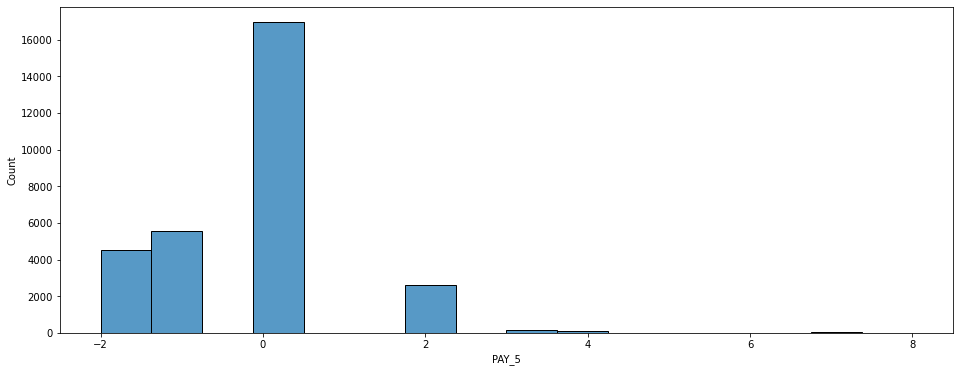

PAY_6


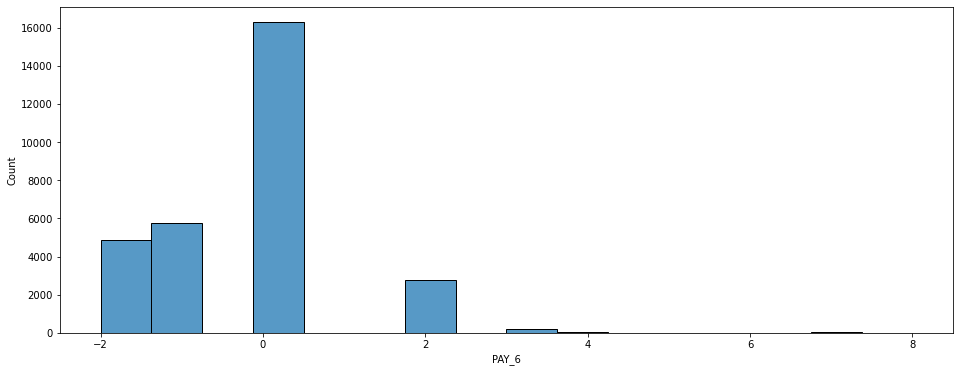

BILL_AMT1


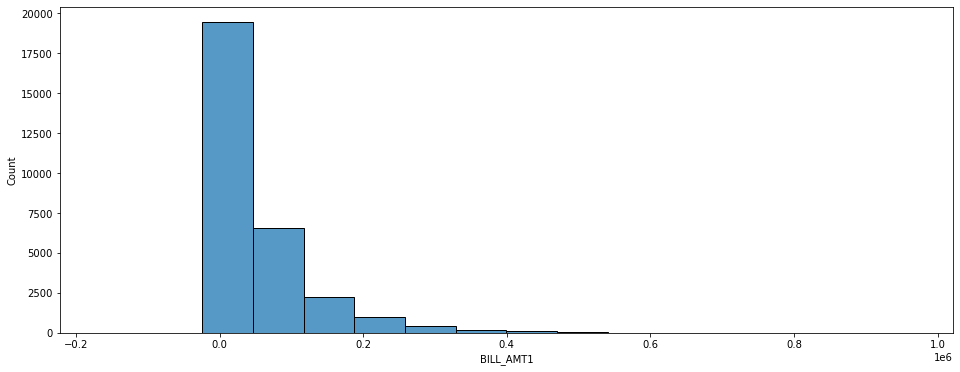

BILL_AMT2


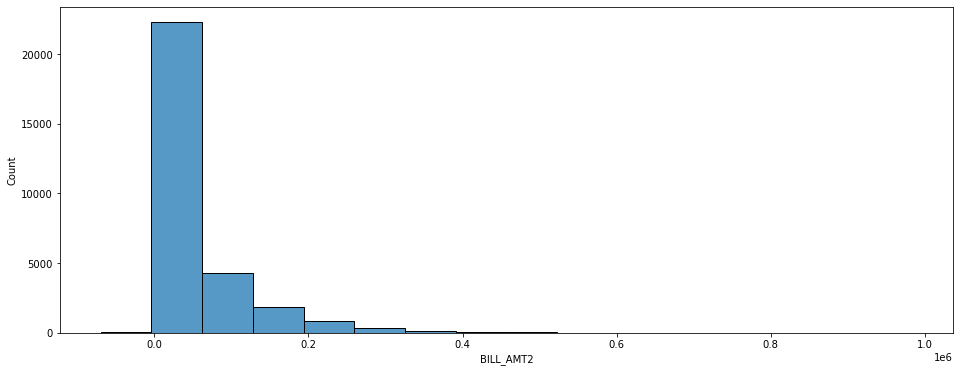

BILL_AMT3


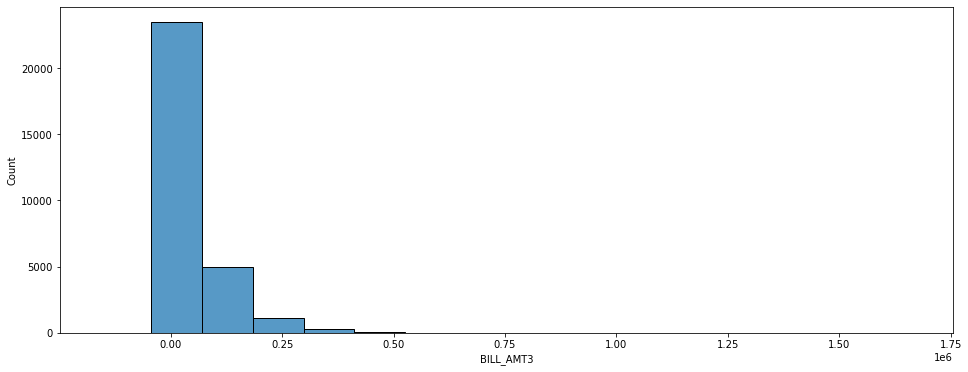

BILL_AMT4


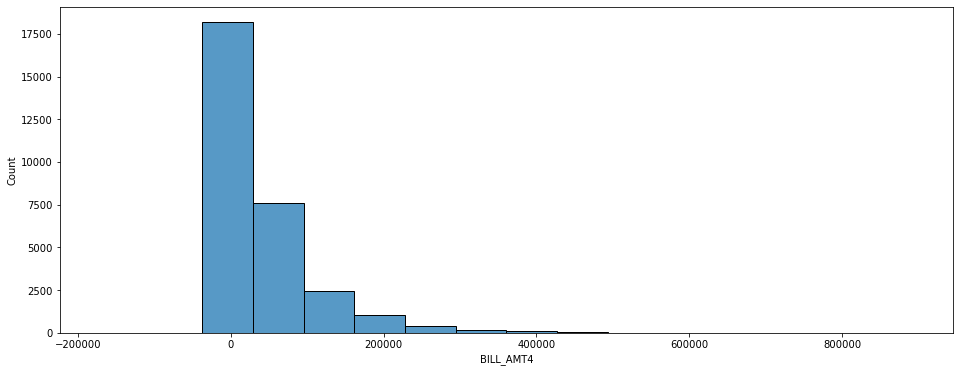

BILL_AMT5


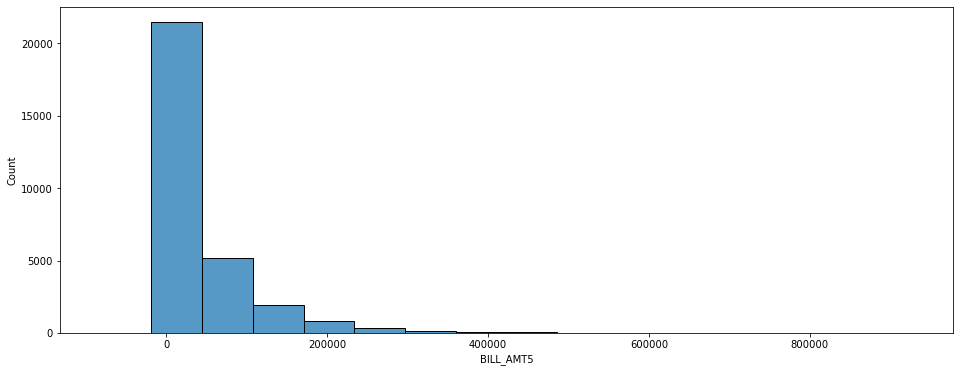

BILL_AMT6


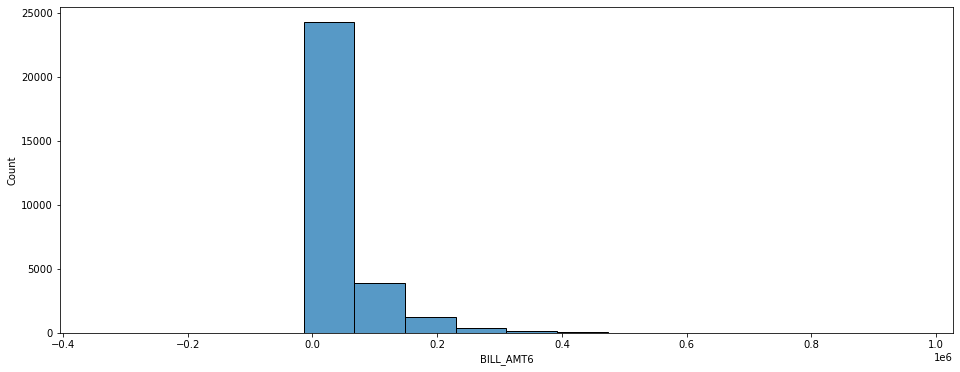

PAY_AMT1


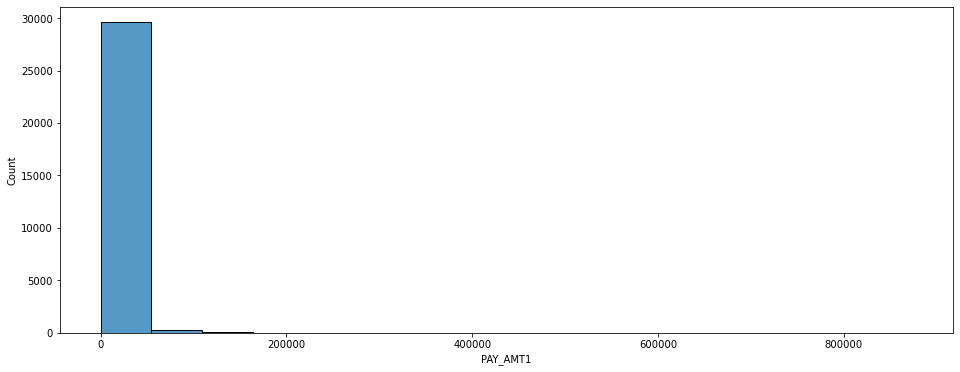

PAY_AMT2


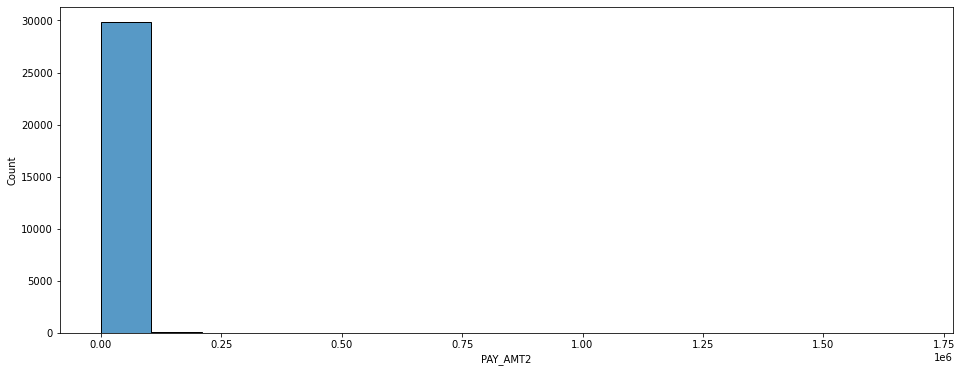

PAY_AMT3


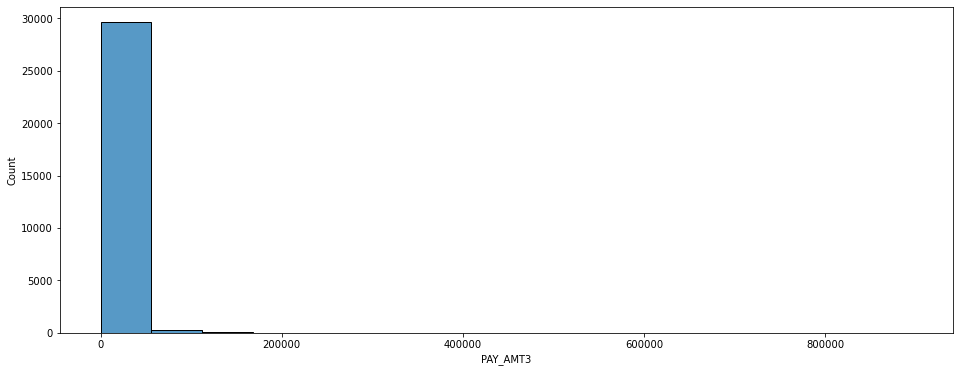

PAY_AMT4


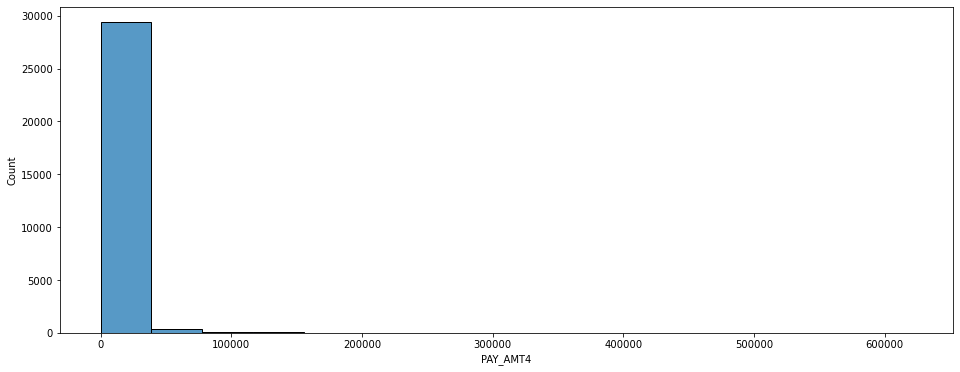

PAY_AMT5


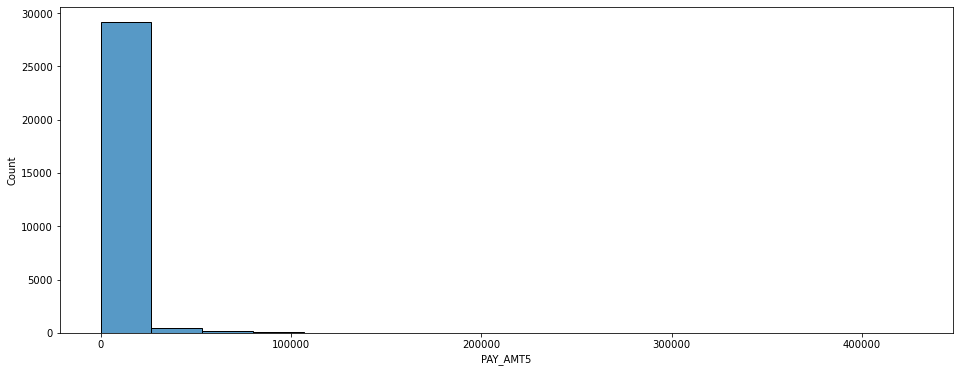

PAY_AMT6


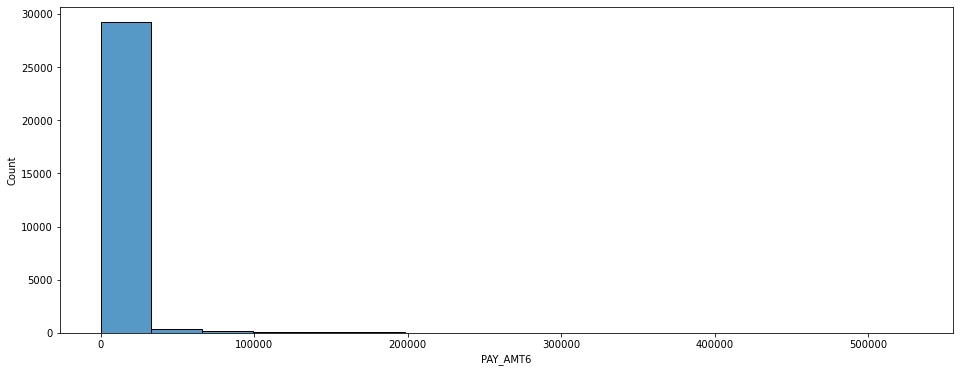

DEFAULT_NEXT_MONTH


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


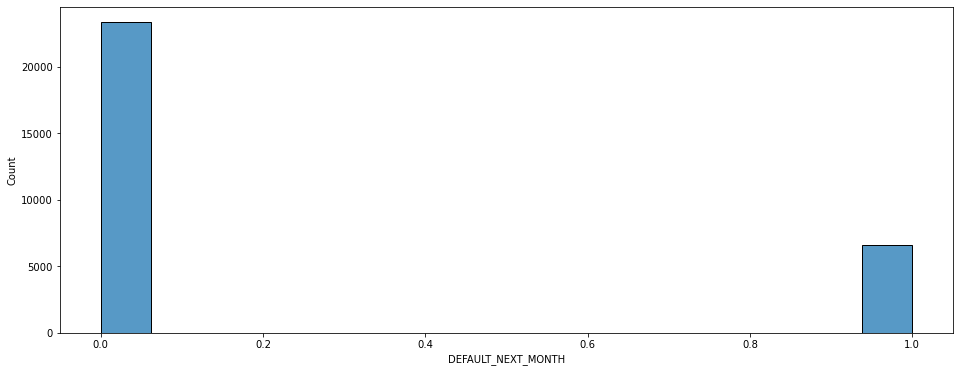

SEX_FEMALE


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


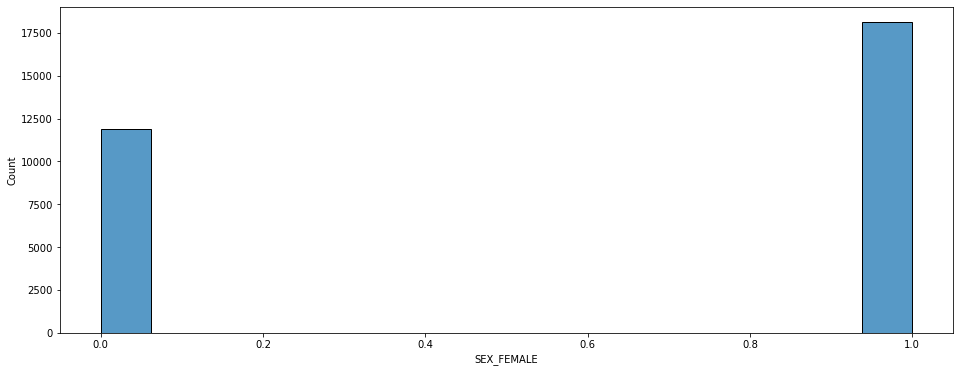

SEX_MALE


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


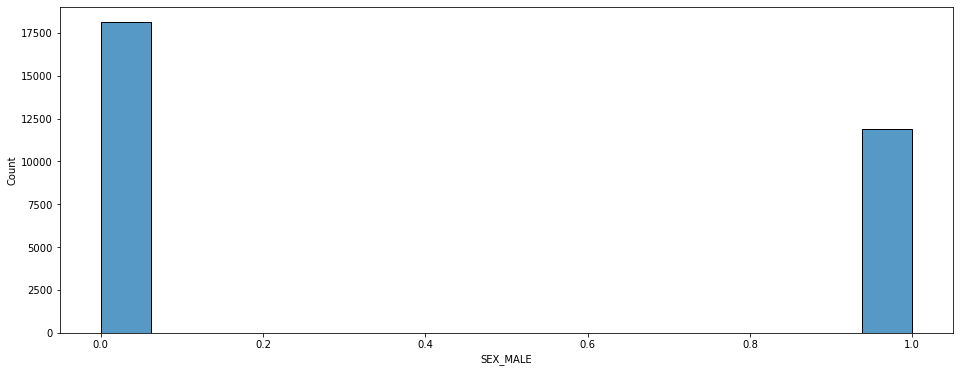

ED_GRAD


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


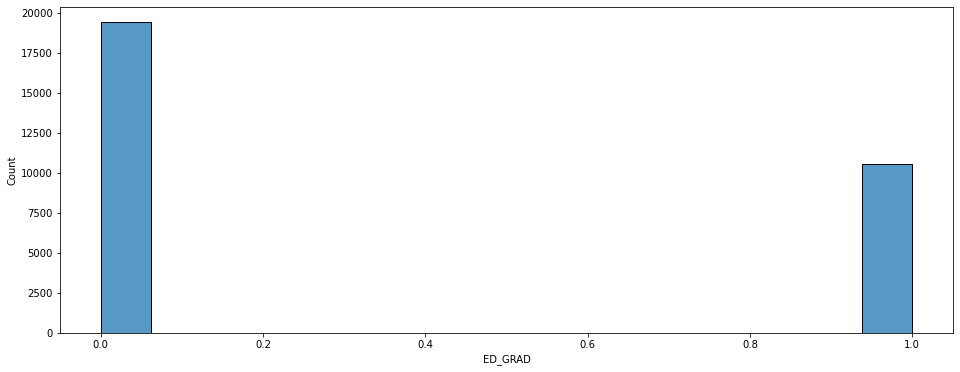

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


ED_HS


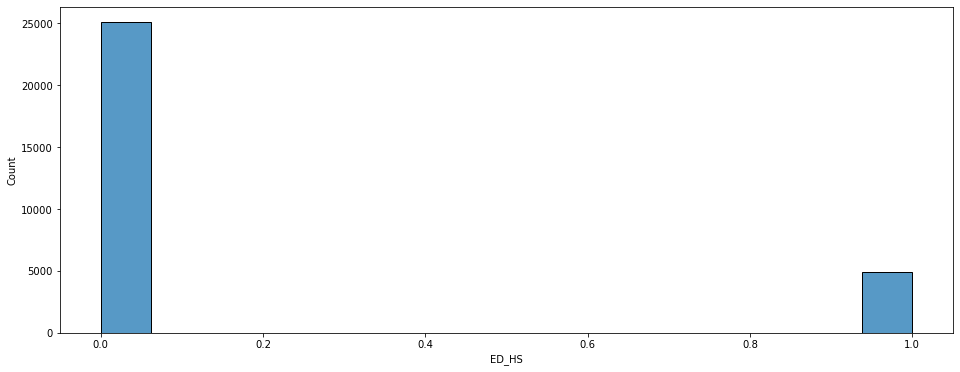

ED_OTHER


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


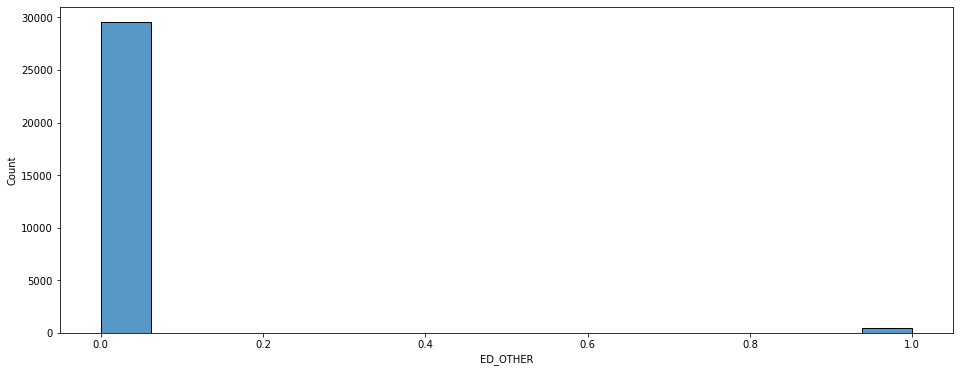

ED_UNI


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


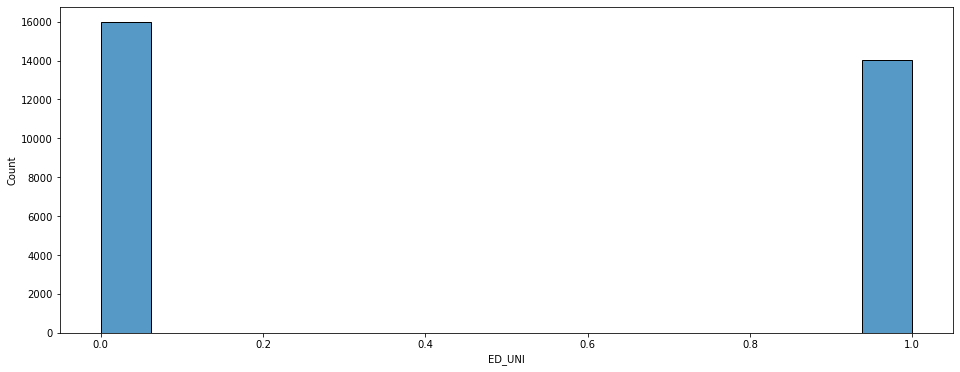

MARRIAGE_0


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


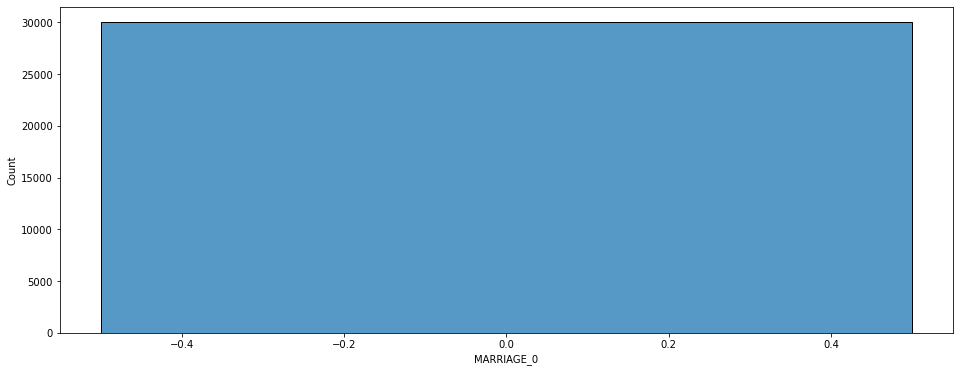

MARRIAGE_1

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


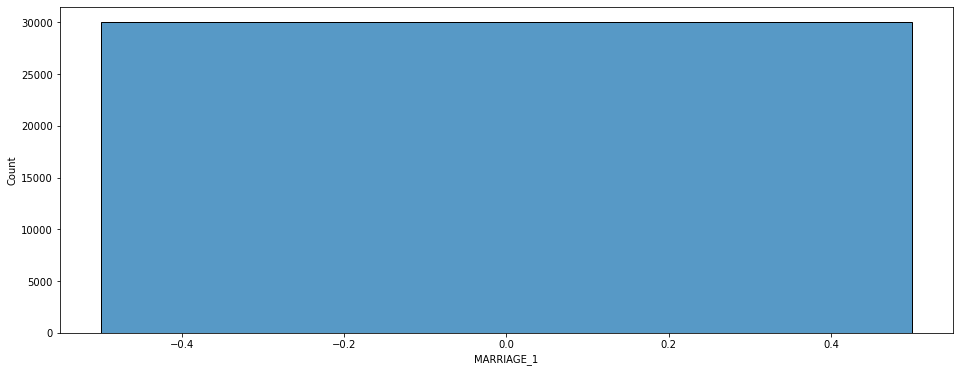

MARRIAGE_2


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


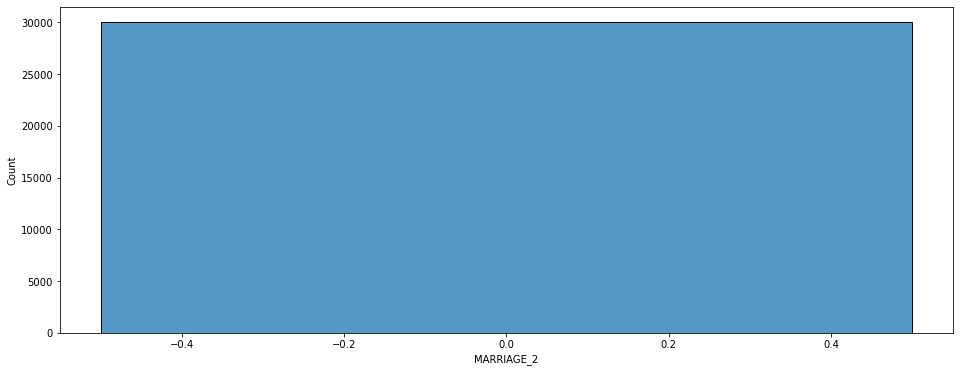

MARRIAGE_3


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


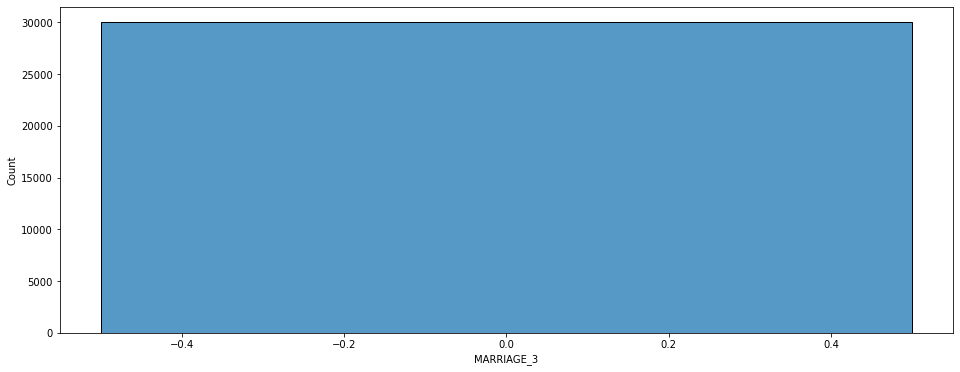

In [6]:
for col in df.columns.values: 
    if col == "ID": continue
    print(col)
    plt.figure(figsize=(16,6))
    sns.histplot(data=df, x=col, bins="sturges")
    plt.show()

Trying to visualize pattern between data of defaulted vs not defaulted

LIMIT_BAL


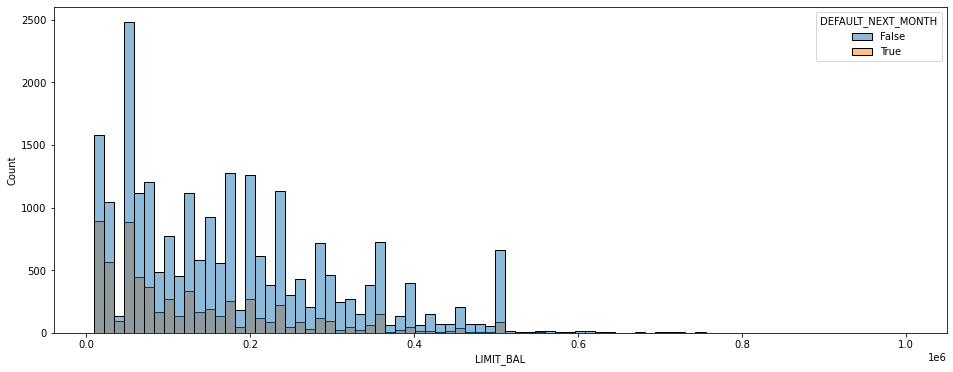

SEX


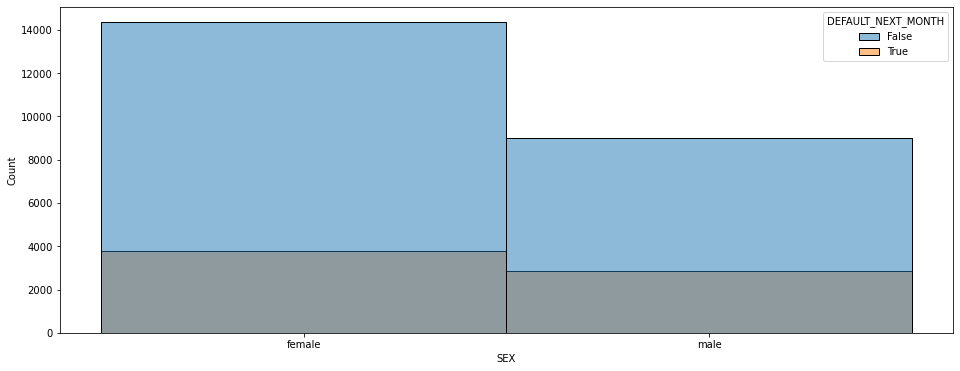

EDUCATION


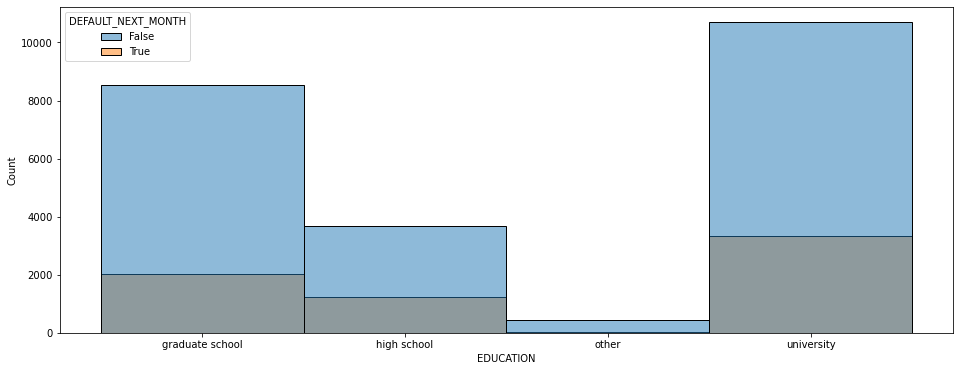

MARRIAGE


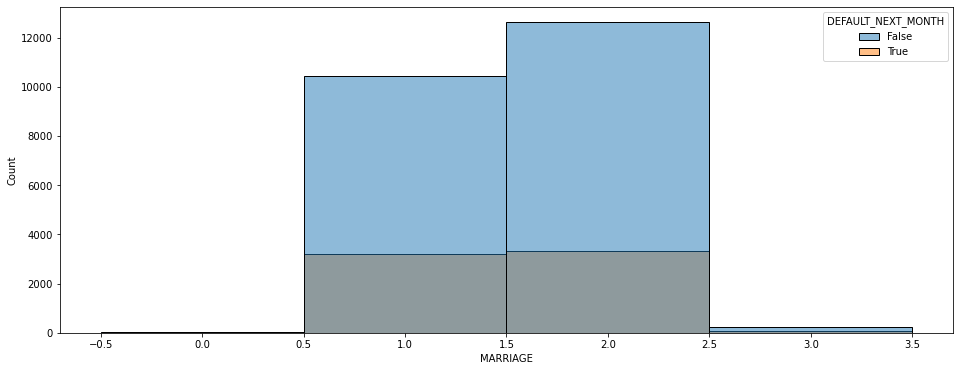

AGE


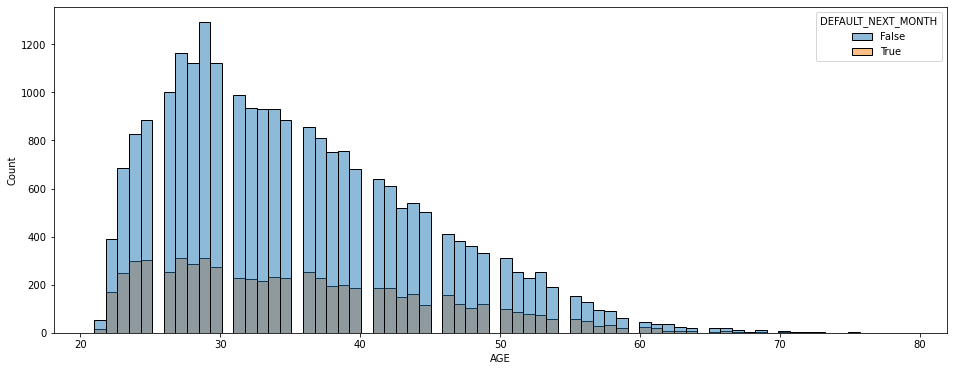

PAY_0


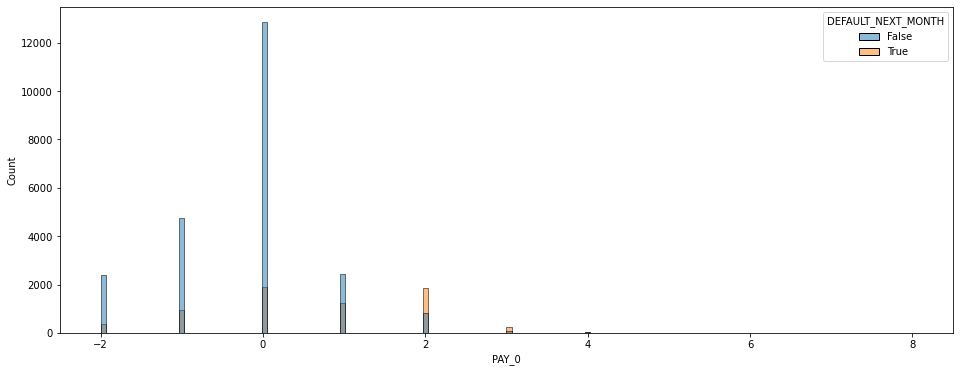

PAY_2


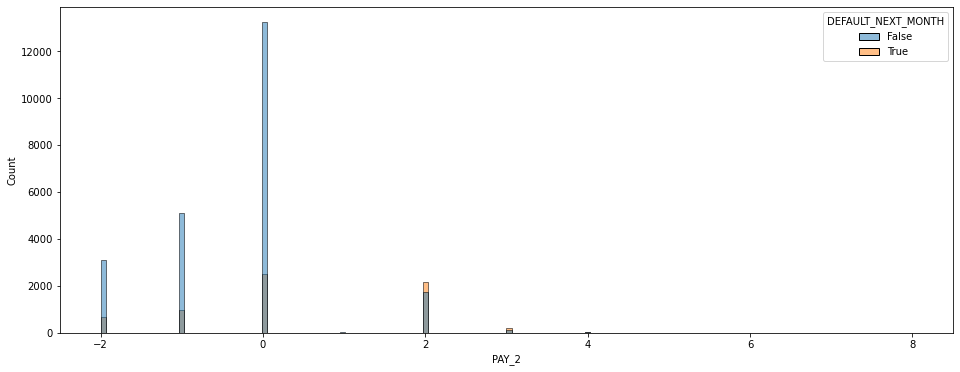

PAY_3


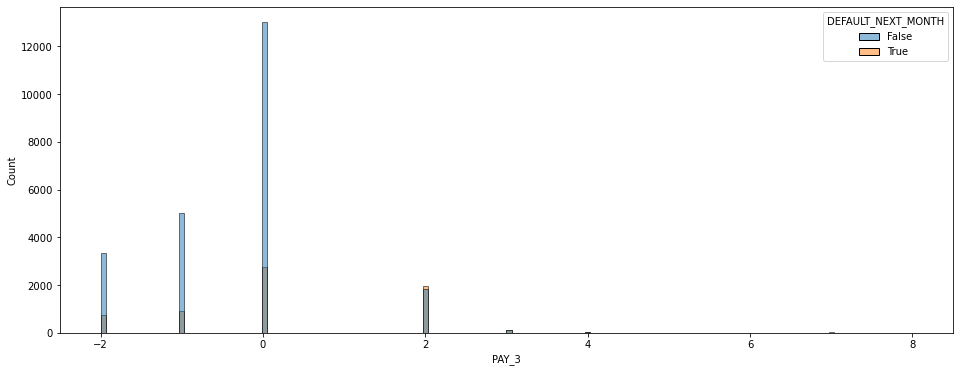

PAY_4


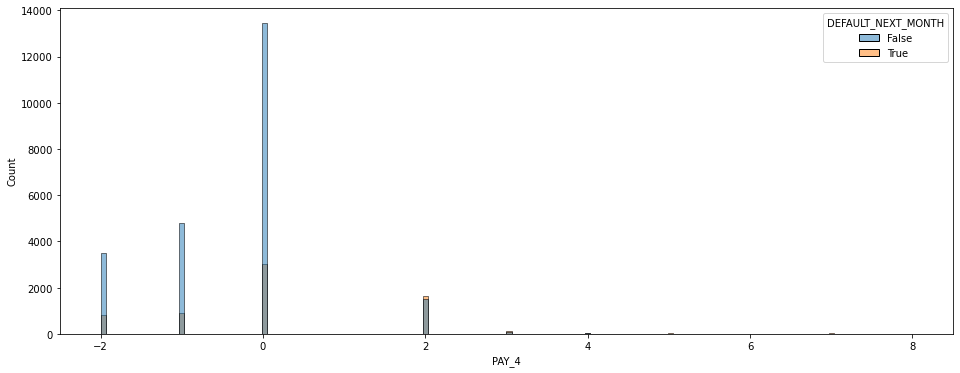

PAY_5


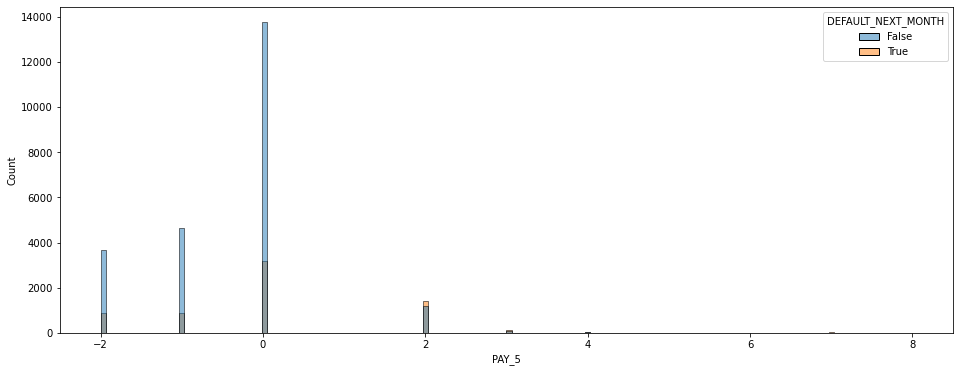

PAY_6


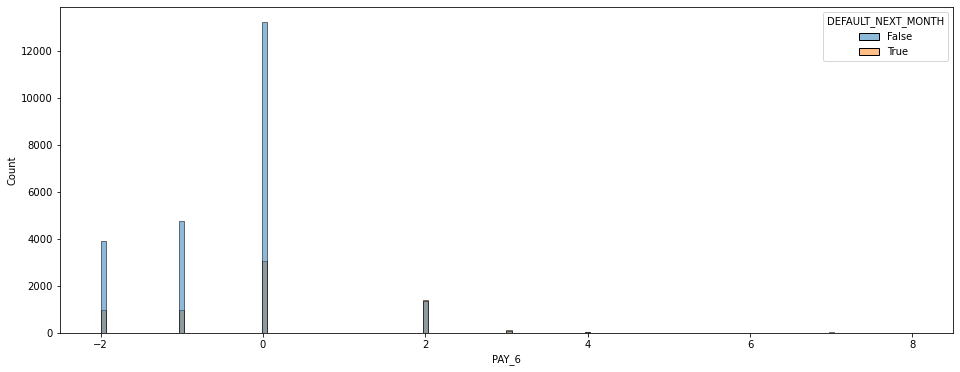

BILL_AMT1


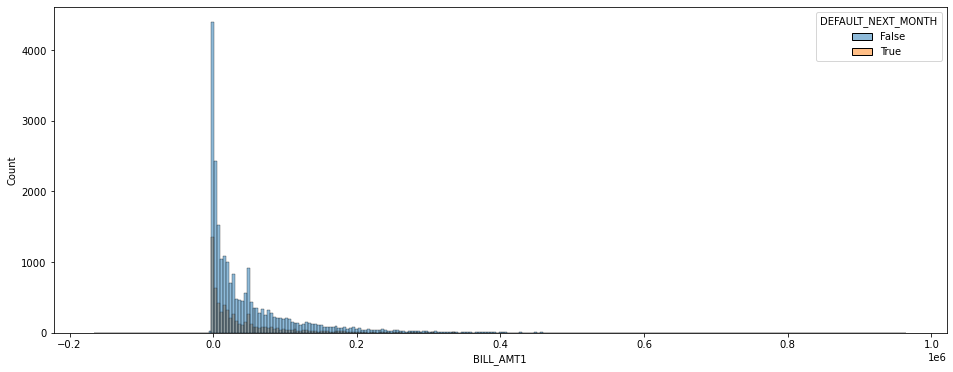

BILL_AMT2


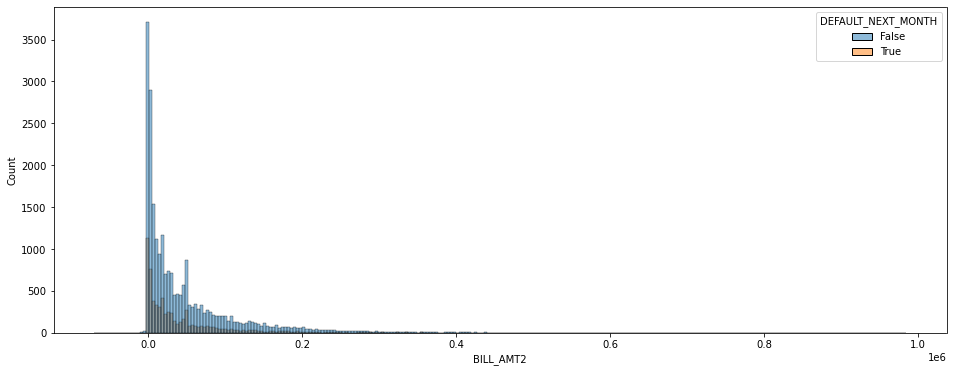

BILL_AMT3


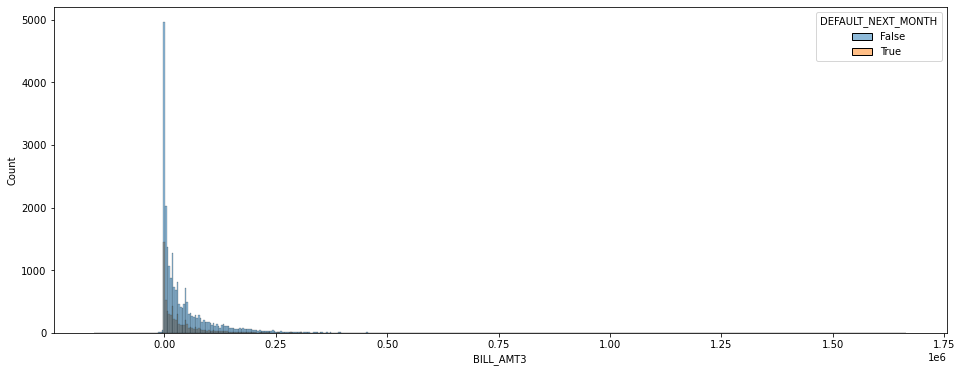

BILL_AMT4


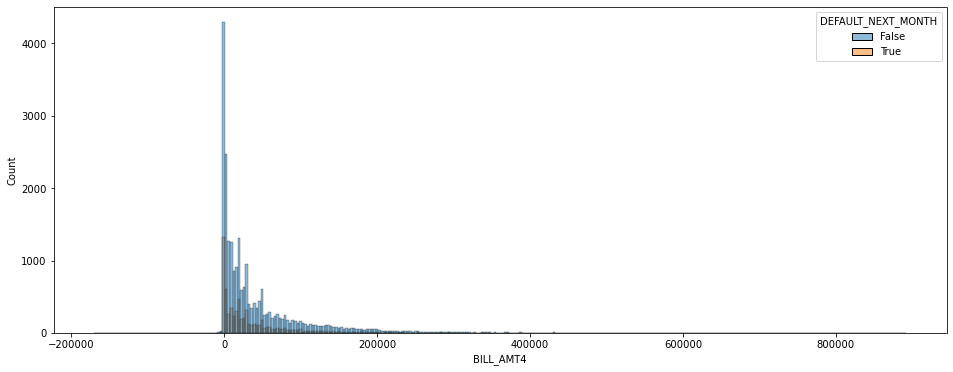

BILL_AMT5


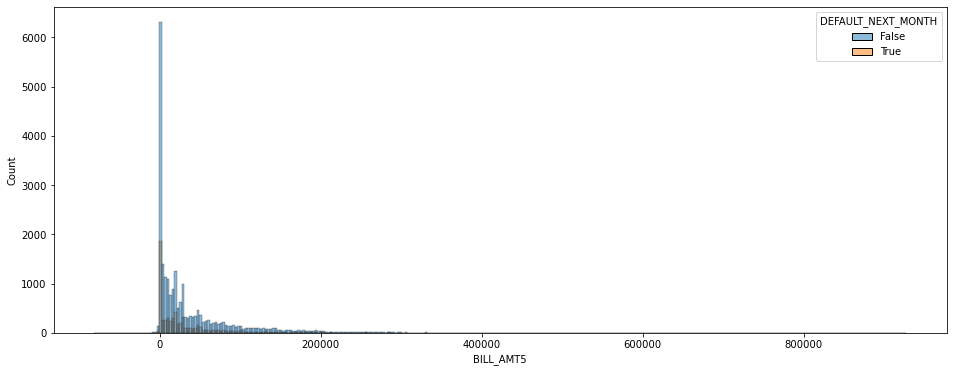

BILL_AMT6


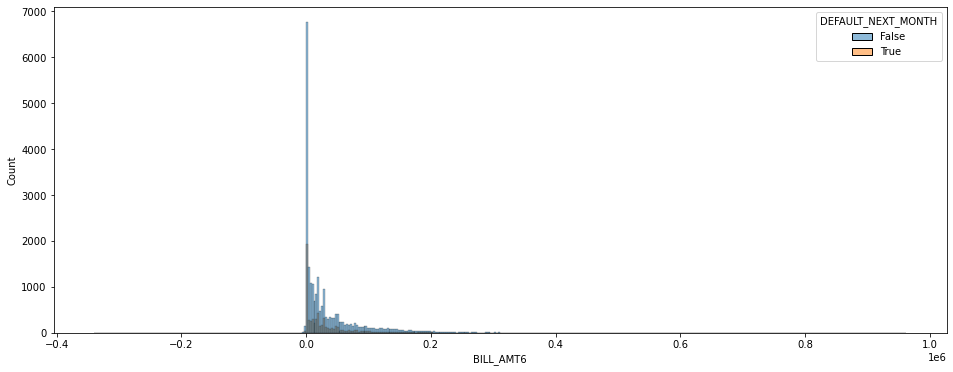

PAY_AMT1


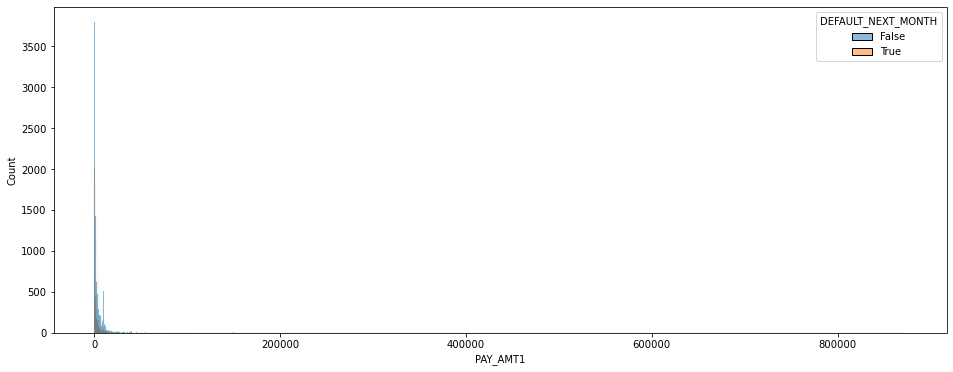

PAY_AMT2


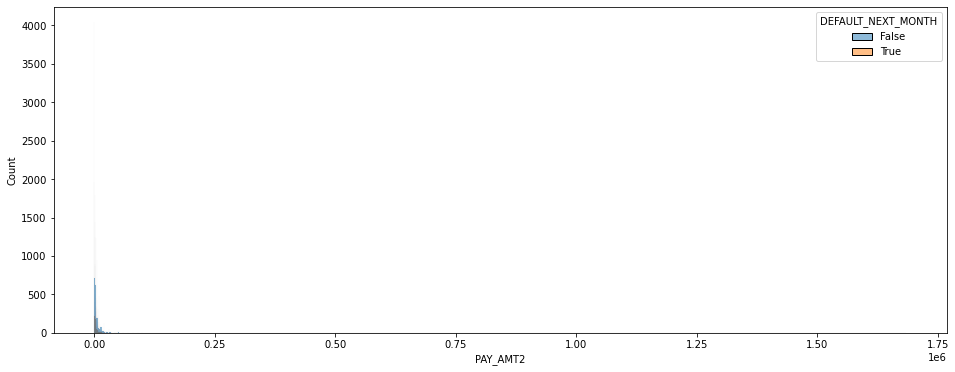

PAY_AMT3


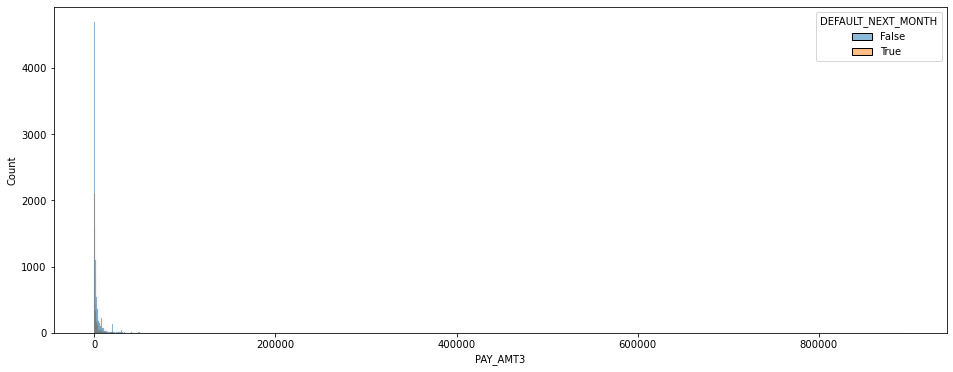

PAY_AMT4


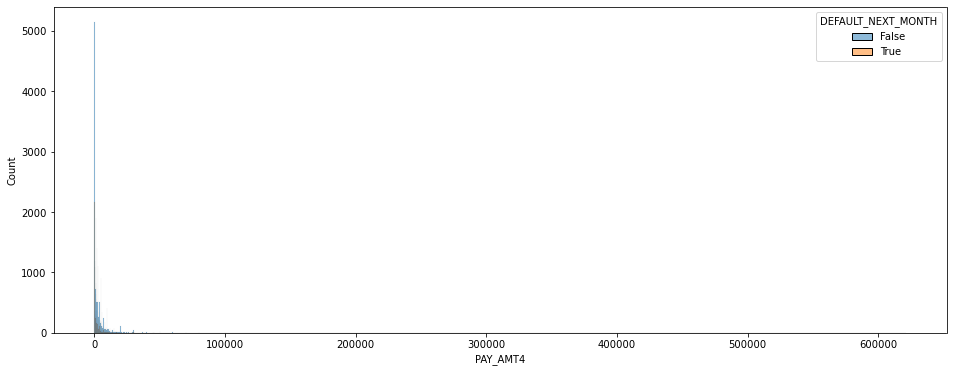

PAY_AMT5


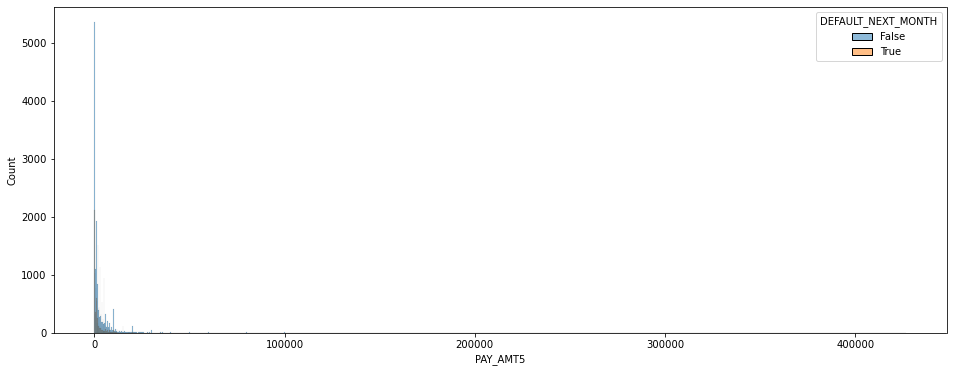

PAY_AMT6


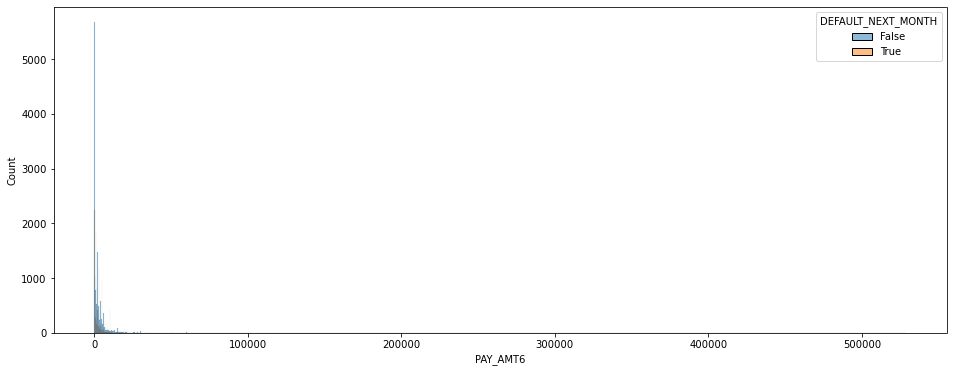

DEFAULT_NEXT_MONTH


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


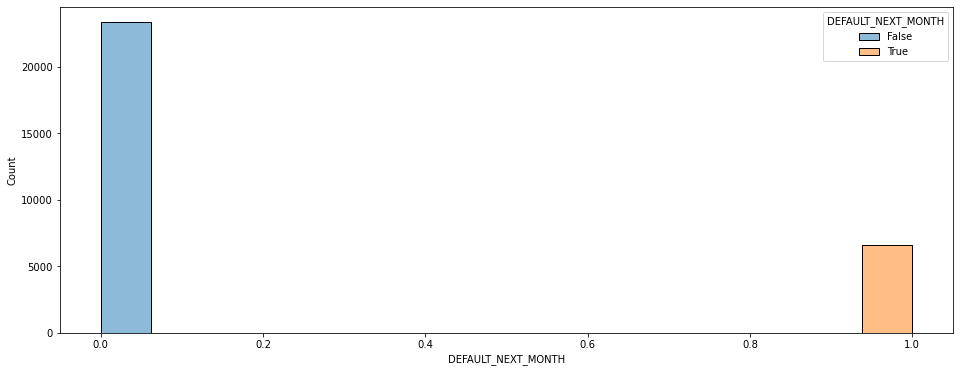

SEX_FEMALE


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


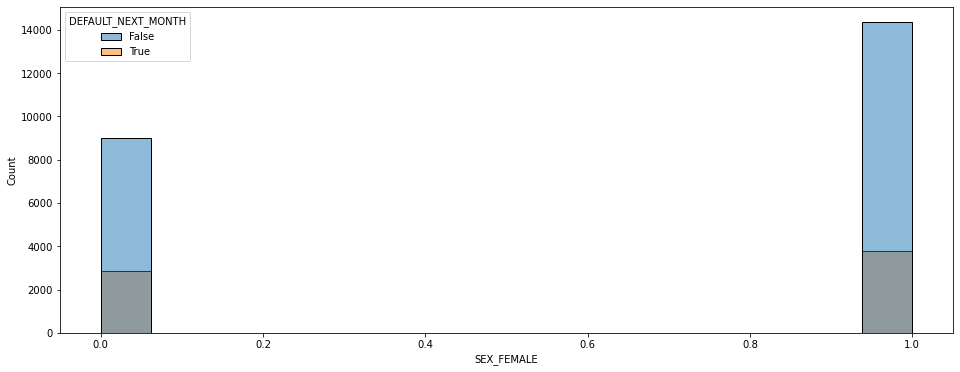

SEX_MALE


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


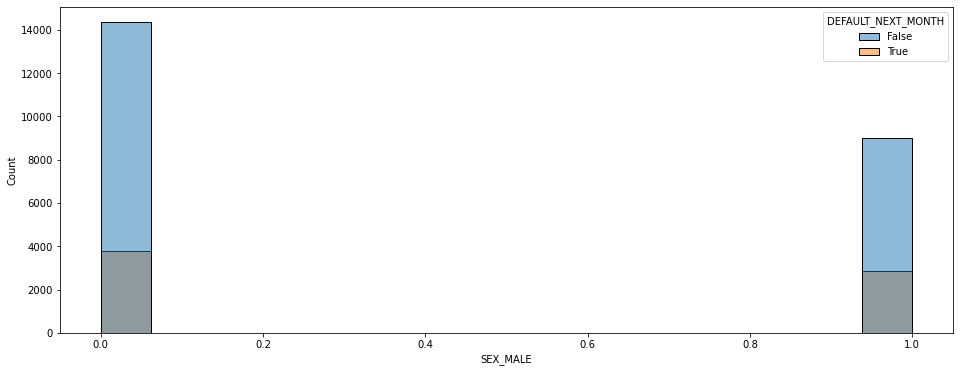

ED_GRAD


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


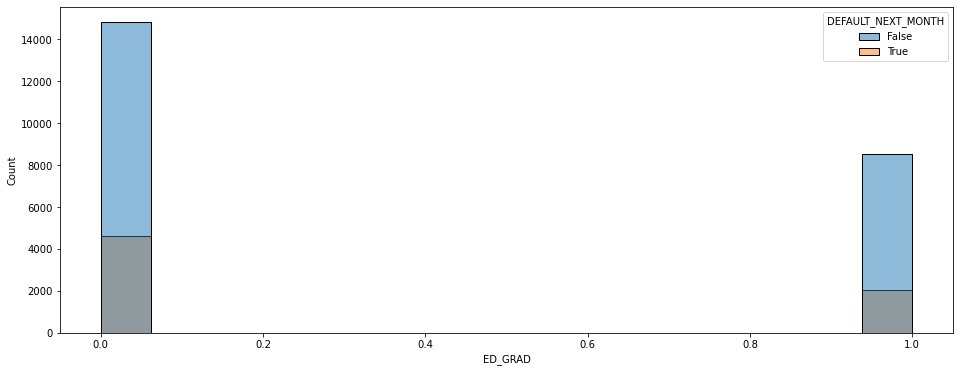

ED_HS


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


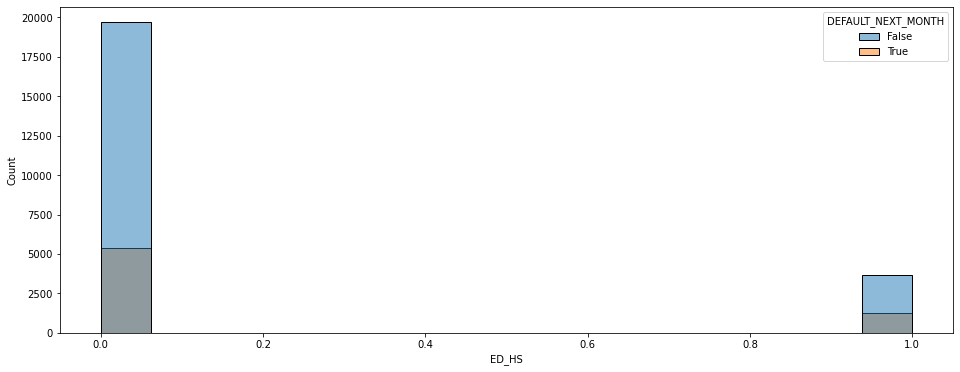

ED_OTHER


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


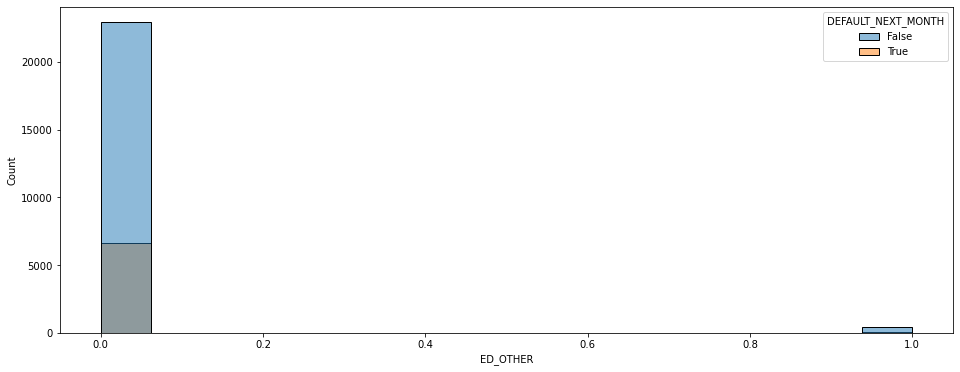

ED_UNI


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


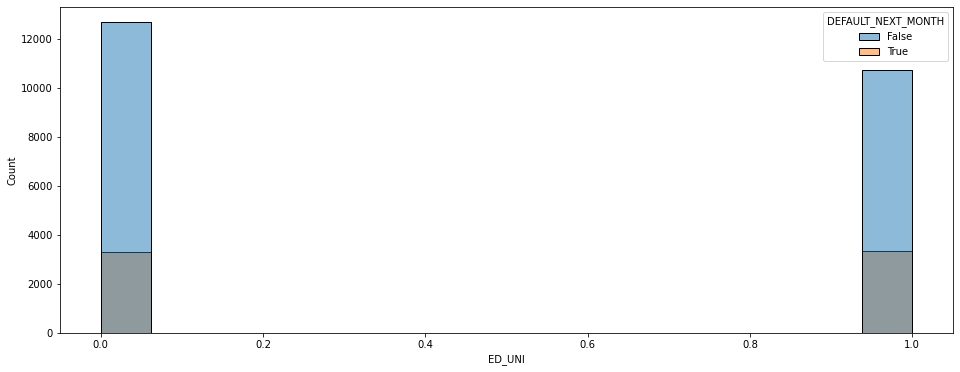

MARRIAGE_0


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


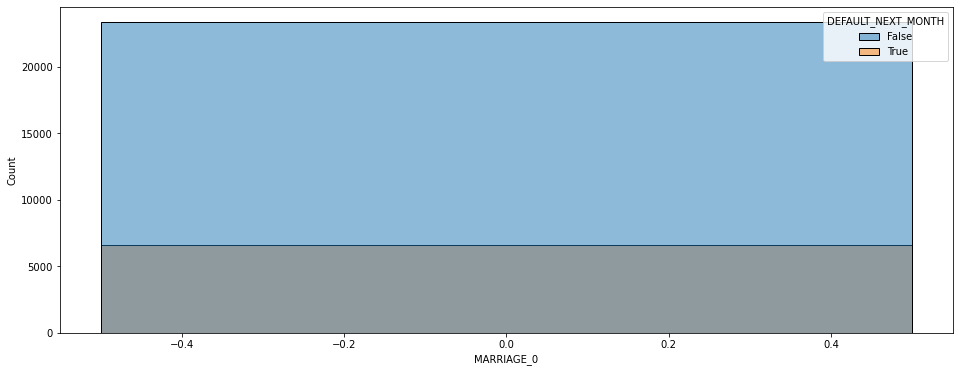

MARRIAGE_1


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


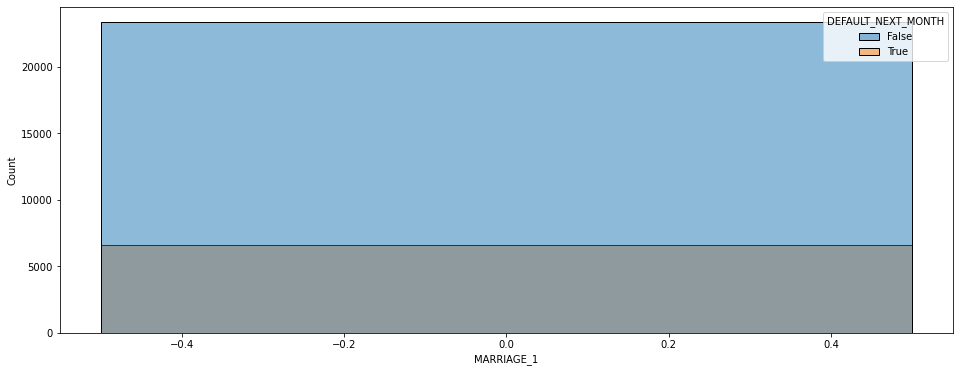

MARRIAGE_2


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


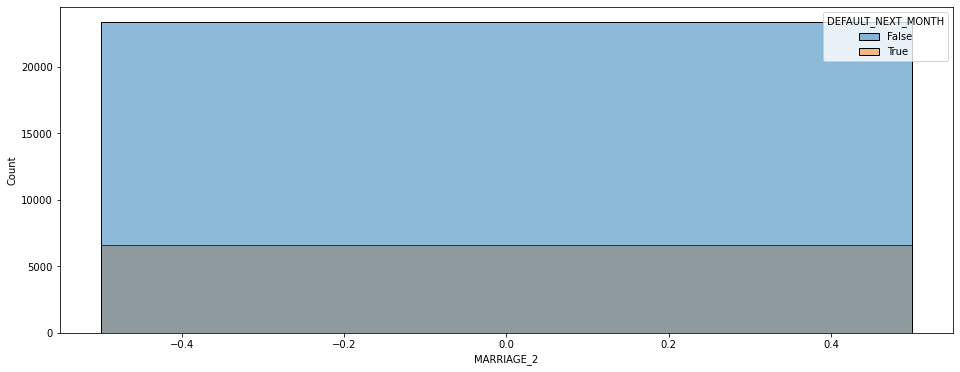

MARRIAGE_3


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


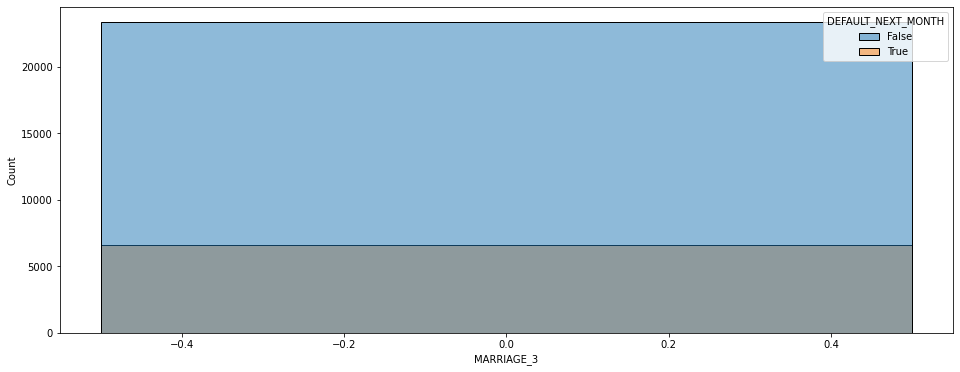

In [7]:
for col in df.columns.values:
    if col=="ID": continue 
    print(col)
    plt.figure(figsize=(16,6))
    sns.histplot(data=df, x=col, hue="DEFAULT_NEXT_MONTH")
    plt.show()

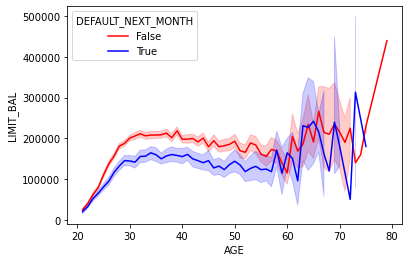

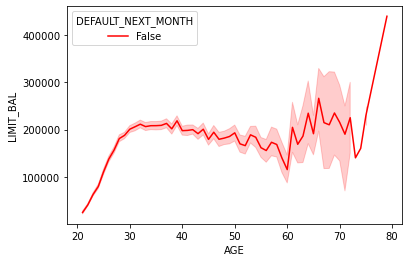

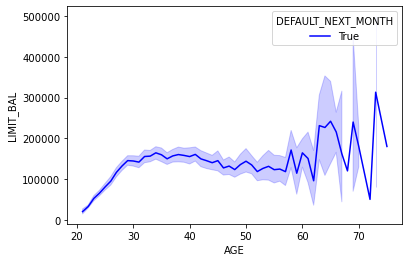

In [8]:
groupByDefault = df.groupby("DEFAULT_NEXT_MONTH")
groupByAge = df.groupby("AGE").mean()

palette = { True: "blue", False: "red" }
sns.lineplot(data=df, x="AGE", y="LIMIT_BAL", hue="DEFAULT_NEXT_MONTH", palette=palette)
plt.show()
for (value, group) in groupByDefault:
    sns.lineplot(data=group, x="AGE", y="LIMIT_BAL", palette=palette, hue="DEFAULT_NEXT_MONTH")
    plt.show()


LIMIT_BAL


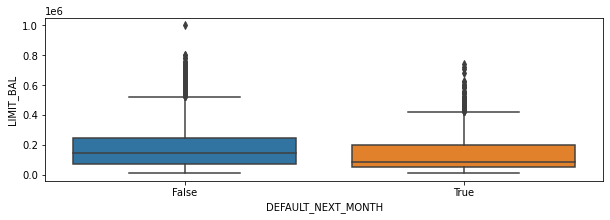

AGE


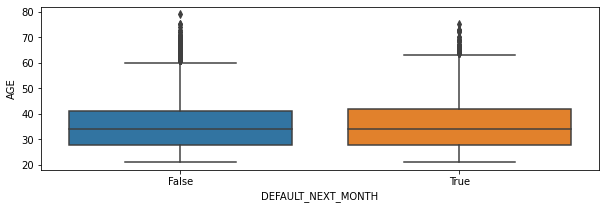

PAY_0


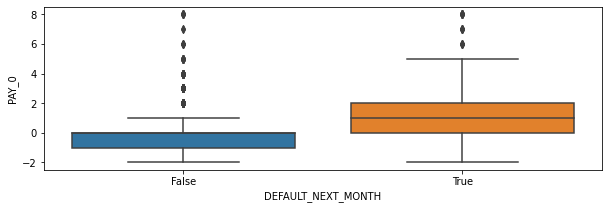

PAY_2


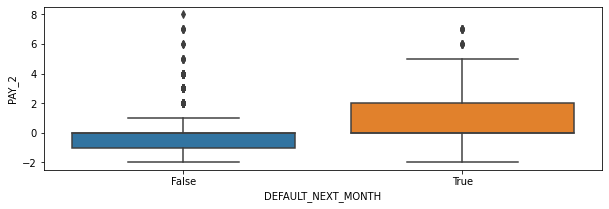

PAY_3


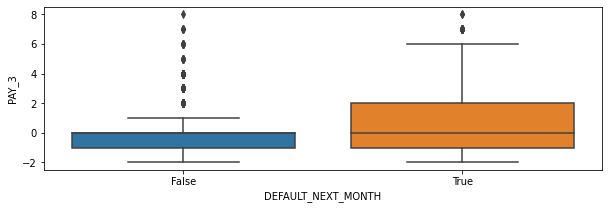

PAY_4


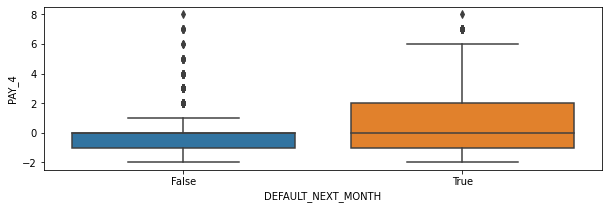

PAY_5


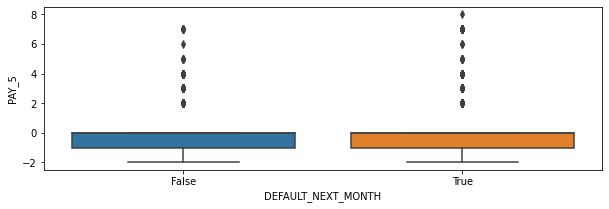

PAY_6


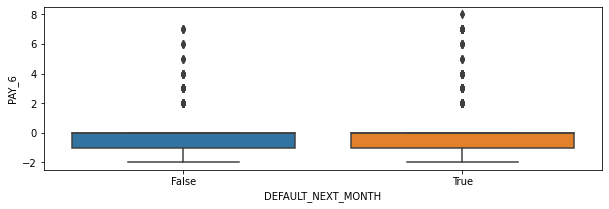

BILL_AMT1


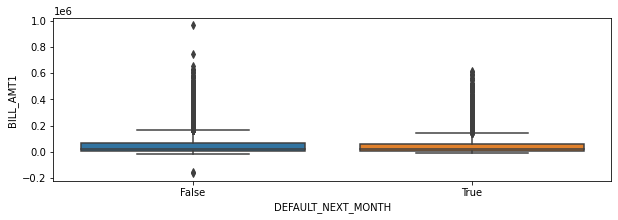

BILL_AMT2


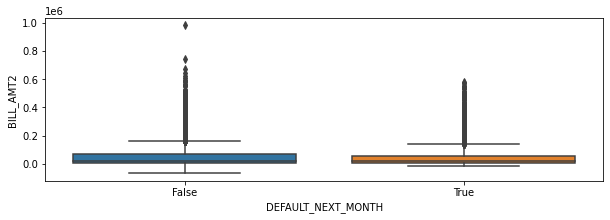

BILL_AMT3


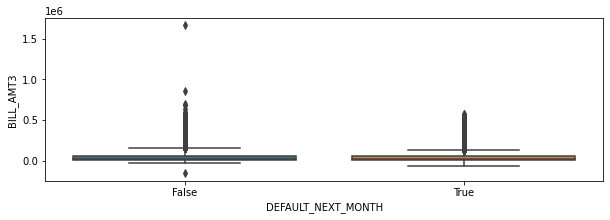

BILL_AMT4


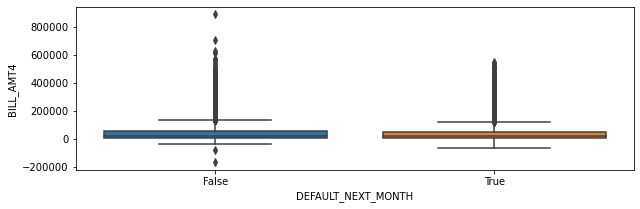

BILL_AMT5


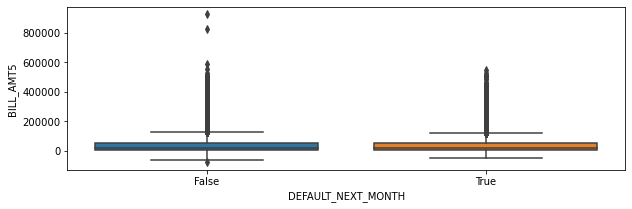

BILL_AMT6


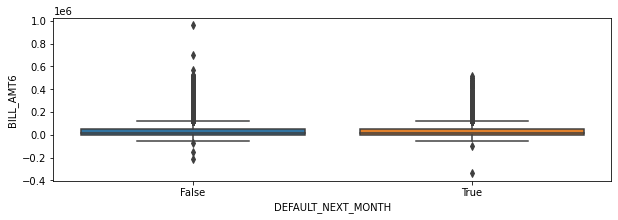

PAY_AMT1


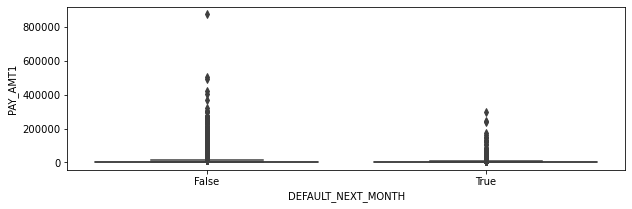

PAY_AMT2


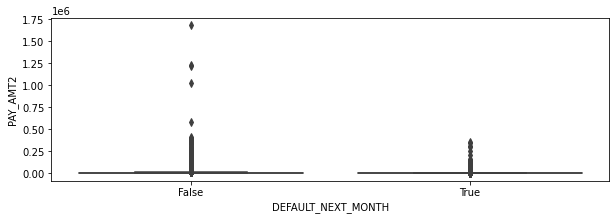

PAY_AMT3


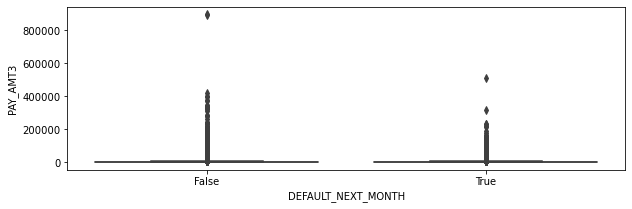

PAY_AMT4


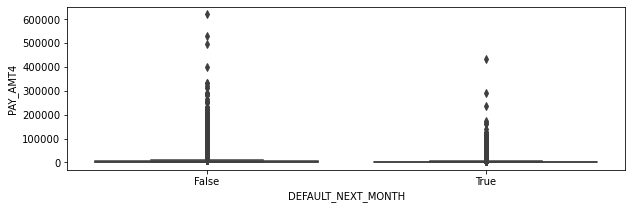

PAY_AMT5


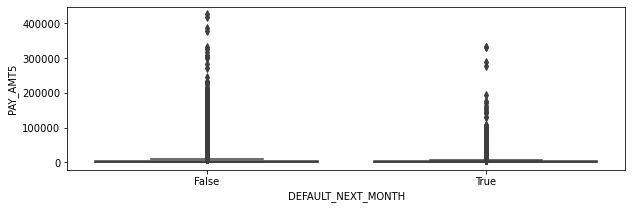

PAY_AMT6


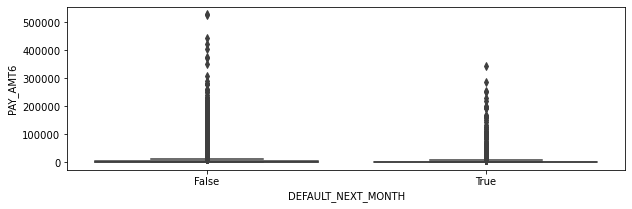

In [44]:
# looking for any wierd distrubutions between customers that default
for col in df.columns.values:
    if df[col].dtype != "float64" : continue
    print(col)
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df, x="DEFAULT_NEXT_MONTH", y=col)
    plt.show()